# Parallel Computing for 94-class Character Recognition Using Convolutional Neural Networks

## Distributed Data Parallel (DDP) Training Analysis

Importing Essential Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading and Exploration

Loading and Displaying Training Metrics Data

In [2]:
# Read the CSV into a DataFrame
ddp_metrics_epoch = pd.read_csv("../TMINST_MultiGPUs_DDP/DDP_experiment_metrics_epoch.csv")

ddp_metrics_epoch

gpu_name each_gpu_memory  gpu_count  batch_size  epoch  \
0    Tesla P100-PCIE-12GB         12194MB          1          64      1   
1    Tesla P100-PCIE-12GB         12194MB          1          64      2   
2    Tesla P100-PCIE-12GB         12194MB          1          64      3   
3    Tesla P100-PCIE-12GB         12194MB          1          64      4   
4    Tesla P100-PCIE-12GB         12194MB          1          64      5   
..                    ...             ...        ...         ...    ...   
283  Tesla P100-PCIE-12GB         12194MB          4        2048      8   
284  Tesla P100-PCIE-12GB         12194MB          4        2048      9   
285  Tesla P100-PCIE-12GB         12194MB          4        2048     10   
286  Tesla P100-PCIE-12GB         12194MB          4        2048     11   
287  Tesla P100-PCIE-12GB         12194MB          4        2048     12   

     train_loss  train_acc  val_loss   val_acc  epoch_train_time  \
0      0.597909   0.831470  0.338040  0.899462         14.226665   
1      0.301739   0.906372  0.285936  0.912061         13.868215   
2      0.253082   0.919873  0.268759  0.917762         13.877411   
3      0.220817   0.928252  0.236238  0.926750         13.829226   
4      0.196074   0.934847  0.233628  0.927846         13.808790   
..          ...        ...       ...       ...               ...   
283    0.486908   0.872994  0.493427  0.875510          2.365451   
284    0.449352   0.882215  0.468677  0.878299          2.682409   
285    0.424532   0.886335  0.438756  0.886167          2.661077   
286    0.394886   0.894937  0.421618  0.891146          2.380510   
287    0.381297   0.897840  0.407468  0.892740          2.774531   

     train_throughput  gpu_util   mem_util  
0        13171.815241     18.00   6.383260  
1        13512.265427     18.00   6.383260  
2        13503.310889     18.00   6.383260  
3        13550.360180     18.00   6.383260  
4        13570.414472     18.00   6.383260  
..                ...       ...        ...  
283      79220.399573     15.25  23.098755  
284      69859.603794     13.50  23.098755  
285      70419.601395     13.75  23.098755  
286      78719.270889     14.50  23.098755  
287      67540.054656     12.25  23.098755  

[288 rows x 13 columns]

The DataFrame contains 288 rows representing different training configurations and epochs, with 13 columns of metrics:
- `gpu_name`: The model of GPU used (Tesla P100-PCIE-12GB)
- `each_gpu_memory`: Memory capacity of each GPU (12194MB)
- `gpu_count`: Number of GPUs used (ranges from 1 to 4)
- `batch_size`: Size of training batches (64 for single GPU, increasing to 2048 with 4 GPUs)
- `epoch`: Training epoch number
- `train_loss`/`val_loss`: Loss metrics for training and validation
- `train_acc`/`val_acc`: Accuracy metrics for training and validation
- `epoch_train_time`: Time taken to complete each epoch
- `train_throughput`: Training examples processed per second
- `gpu_util`/`mem_util`: GPU and memory utilization percentages

We load a second CSV file containing the final test results from our distributed training experiments. While the previous dataset showed epoch-by-epoch training metrics, this dataset provides the overall performance metrics after complete training runs with different hardware configurations.

In [3]:
# Read the CSV into a DataFrame
ddp_metrics_test = pd.read_csv("../TMINST_MultiGPUs_DDP/DDP_experiment_metrics_test.csv")

ddp_metrics_test

gpu_name each_gpu_memory  gpu_count  batch_size  \
0   Tesla P100-PCIE-12GB         12194MB          1          64   
1   Tesla P100-PCIE-12GB         12194MB          2          64   
2   Tesla P100-PCIE-12GB         12194MB          3          64   
3   Tesla P100-PCIE-12GB         12194MB          4          64   
4   Tesla P100-PCIE-12GB         12194MB          1         128   
5   Tesla P100-PCIE-12GB         12194MB          2         128   
6   Tesla P100-PCIE-12GB         12194MB          3         128   
7   Tesla P100-PCIE-12GB         12194MB          4         128   
8   Tesla P100-PCIE-12GB         12194MB          1         256   
9   Tesla P100-PCIE-12GB         12194MB          2         256   
10  Tesla P100-PCIE-12GB         12194MB          3         256   
11  Tesla P100-PCIE-12GB         12194MB          4         256   
12  Tesla P100-PCIE-12GB         12194MB          1         512   
13  Tesla P100-PCIE-12GB         12194MB          2         512   
14  Tesla P100-PCIE-12GB         12194MB          3         512   
15  Tesla P100-PCIE-12GB         12194MB          4         512   
16  Tesla P100-PCIE-12GB         12194MB          1        1024   
17  Tesla P100-PCIE-12GB         12194MB          2        1024   
18  Tesla P100-PCIE-12GB         12194MB          3        1024   
19  Tesla P100-PCIE-12GB         12194MB          4        1024   
20  Tesla P100-PCIE-12GB         12194MB          1        2048   
21  Tesla P100-PCIE-12GB         12194MB          2        2048   
22  Tesla P100-PCIE-12GB         12194MB          3        2048   
23  Tesla P100-PCIE-12GB         12194MB          4        2048   

    total_training_time  test_loss  test_acc  
0            166.221044   0.257792  0.931992  
1             89.758089   0.249722  0.930448  
2             60.312971   0.231266  0.932465  
3             45.430460   0.225746  0.932490  
4            127.738831   0.239562  0.931419  
5             67.792323   0.236195  0.929601  
6             44.639975   0.238581  0.929377  
7             37.692451   0.237110  0.928929  
8            108.184208   0.229301  0.931469  
9             59.446196   0.242302  0.928381  
10            40.301718   0.261194  0.920213  
11            30.655070   0.255940  0.924920  
12           102.217083   0.242125  0.928107  
13            54.872700   0.276270  0.915382  
14            40.072152   0.271314  0.920313  
15            29.317574   0.279297  0.919068  
16           104.311551   0.256155  0.925119  
17            53.091633   0.290364  0.917623  
18            36.196664   0.328211  0.907513  
19            29.627213   0.330313  0.906716  
20           105.868558   0.285350  0.918719  
21            53.709760   0.345045  0.902757  
22            37.393724   0.388624  0.894066  
23            31.723614   0.402406  0.891426

The DataFrame contains 24 rows (partial view shown), with each row representing a different training configuration:

- `gpu_name`: All experiments use Tesla P100-PCIE-12GB GPUs
- `each_gpu_memory`: Each GPU has 12194MB of memory
- `gpu_count`: Number of GPUs used in parallel (ranges from 1 to 4)
- `batch_size`: Batch sizes tested (64, 128, 256, 512, 1024, 2048)
- `total_training_time`: Time in seconds to complete the entire training process
- `test_loss` and `test_acc`: Final model performance on the test dataset

## Visualizing Learning Curves by GPU Count and Batch Size

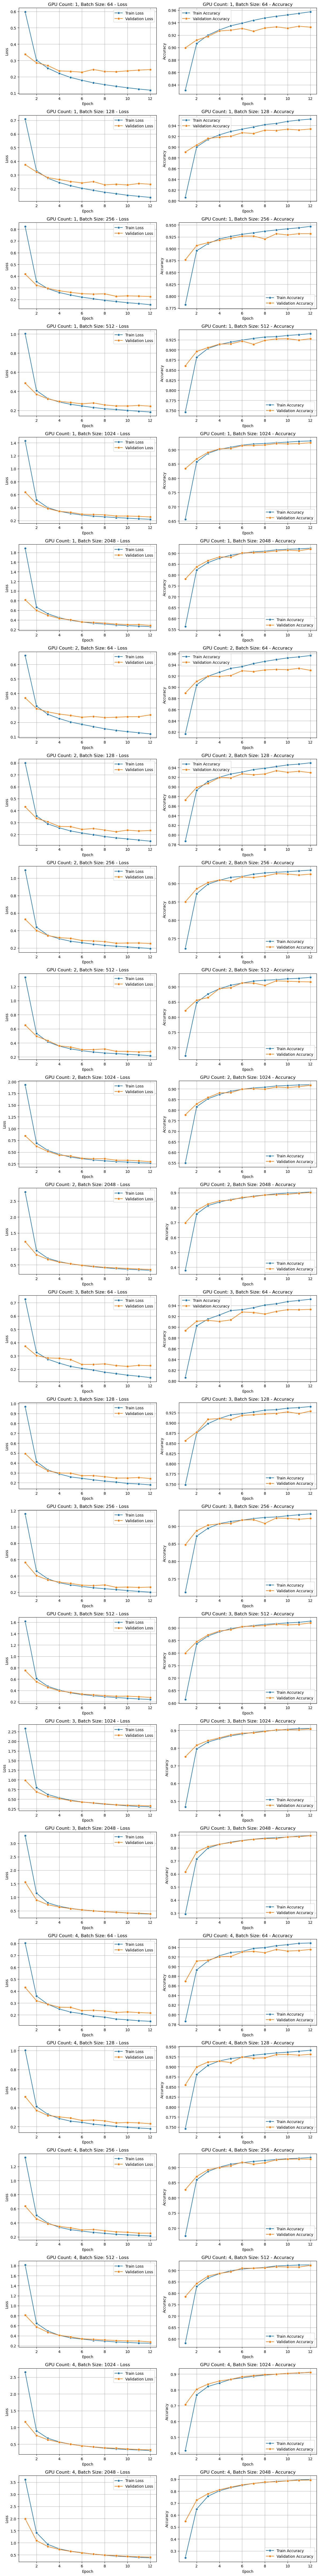

In [4]:
# Group the epoch metrics by 'gpu_count' and 'batch_size'
grouped = ddp_metrics_epoch.groupby(['gpu_count', 'batch_size'])
n_groups = grouped.ngroups

# Create subplots with 2 columns: one for Loss curves and one for Accuracy curves.
fig, axes = plt.subplots(nrows=n_groups, ncols=2, figsize=(12, 4 * n_groups), squeeze=False)

# Iterate over each group and plot the curves
for i, ((gpu_count, batch_size), group_data) in enumerate(grouped):
    # Left subplot for Loss curves (train_loss and val_loss)
    ax_loss = axes[i, 0]
    sns.lineplot(data=group_data, x='epoch', y='train_loss', ax=ax_loss, marker='o', label='Train Loss')
    sns.lineplot(data=group_data, x='epoch', y='val_loss', ax=ax_loss, marker='o', label='Validation Loss')
    ax_loss.set_title(f'GPU Count: {gpu_count}, Batch Size: {batch_size} - Loss')
    ax_loss.set_xlabel('Epoch')
    ax_loss.set_ylabel('Loss')
    ax_loss.legend()
    ax_loss.grid(True)
    # Right subplot for Accuracy curves (train_acc and val_acc)
    ax_acc = axes[i, 1]
    sns.lineplot(data=group_data, x='epoch', y='train_acc', ax=ax_acc, marker='o', label='Train Accuracy')
    sns.lineplot(data=group_data, x='epoch', y='val_acc', ax=ax_acc, marker='o', label='Validation Accuracy')
    ax_acc.set_title(f'GPU Count: {gpu_count}, Batch Size: {batch_size} - Accuracy')
    ax_acc.set_xlabel('Epoch')
    ax_acc.set_ylabel('Accuracy')
    ax_acc.legend()
    ax_acc.grid(True)
    
# Adjust the layout so titles and labels do not overlap
plt.tight_layout()
plt.show()

These plots reveal several important aspects of distributed training:
- **Convergence rate**: How quickly the model learns under different configurations
- **Generalization gap**: The difference between training and validation metrics
- **Scaling efficiency**: How adding more GPUs affects learning at different batch sizes
- **Stability**: Whether training is smooth or shows fluctuations under certain configurations

## Finding the Optimal Training Configuration

The composite score is defined as follows:
$$\text{composite\_score} = (\text{train\_acc} + \text{val\_acc} + \text{test\_acc}) - (\text{train\_loss} + \text{val\_loss})$$

In [5]:
# Group epoch metrics by 'gpu_count' and 'batch_size'
# For each group, choose the row (epoch) with the highest validation accuracy.
best_epoch = ddp_metrics_epoch.loc[ddp_metrics_epoch.groupby(['gpu_count', 'batch_size'])['val_acc'].idxmax()].copy()

# Merge the best epoch information with the test data based on 'gpu_count' and 'batch_size'
merged = pd.merge(
    best_epoch,
    ddp_metrics_test[['gpu_count', 'batch_size', 'test_acc']],
    on=['gpu_count', 'batch_size'],
    how='left'
)

# Compute a composite score
# Composite Score = (train_acc + val_acc + test_acc) - (train_loss + val_loss)
merged['composite_score'] = (merged['train_acc'] + merged['val_acc'] + merged['test_acc']) - (merged['train_loss'] + merged['val_loss'])

# Identify the overall best configuration (highest composite score)
overall_best = merged.loc[merged['composite_score'].idxmax()]
print("Overall Best Configuration Based on Composite Score:")
print(f"GPU Count: {overall_best['gpu_count']}, Batch Size: {overall_best['batch_size']}")
print(f"    Best Epoch: {int(overall_best['epoch'])}")
print(f"    Train Accuracy:    {overall_best['train_acc']:.4f}")
print(f"    Validation Accuracy: {overall_best['val_acc']:.4f}")
print(f"    Test Accuracy:     {overall_best['test_acc']:.4f}")
print(f"    Train Loss:        {overall_best['train_loss']:.4f}")
print(f"    Validation Loss:   {overall_best['val_loss']:.4f}")
print(f"    Composite Score:   {overall_best['composite_score']:.4f}")

Overall Best Configuration Based on Composite Score:
GPU Count: 1, Batch Size: 64
    Best Epoch: 11
    Train Accuracy:    0.9549
    Validation Accuracy: 0.9342
    Test Accuracy:     0.9320
    Train Loss:        0.1252
    Validation Loss:   0.2411
    Composite Score:   2.4548


The output reveals that the best overall configuration is:
- **GPU Count: 1, Batch Size: 64** (single GPU with modest batch size)
- **Best Epoch: 11** (model reached peak performance relatively early)
- Excellent accuracy across all datasets (train: 0.9549, validation: 0.9342, test: 0.9320)
- Low loss values (train: 0.1252, validation: 0.2411)
- **Composite Score: 2.4548**

Surprisingly, this analysis shows that a single GPU with a smaller batch size outperformed configurations with multiple GPUs and larger batches. This demonstrates that distributed training with larger batches doesn't always yield the best model quality, even though it might train faster.

## Comparing Test Accuracy Across Configurations

Examining Model Performance Across GPU Counts and Batch Sizes

In [6]:
# Additionally, print the test accuracy values (in percentage) for each combination in the console.
print("Test Accuracy for each GPU Count and Batch Size (in percentage):")
# Create a new DataFrame column for percentage display and print it.
ddp_metrics_test['test_acc_percentage'] = ddp_metrics_test['test_acc'] * 100
print(ddp_metrics_test[['gpu_count', 'batch_size', 'test_acc_percentage']])

Test Accuracy for each GPU Count and Batch Size (in percentage):
    gpu_count  batch_size  test_acc_percentage
0           1          64            93.199193
1           2          64            93.044799
2           3          64            93.246507
3           4          64            93.248998
4           1         128            93.141918
5           2         128            92.960131
6           3         128            92.937719
7           4         128            92.892895
8           1         256            93.146898
9           2         256            92.838110
10          3         256            92.021316
11          4         256            92.491969
12          1         512            92.810718
13          2         512            91.538213
14          3         512            92.031277
15          4         512            91.906766
16          1        1024            92.511891
17          2        1024            91.762333
18          3        1024            90.75

Looking at the test accuracy percentages reveals several important patterns:

1. **Highest Accuracy**: The best test accuracy (93.25%) is achieved with 4 GPUs and batch size 64, though several configurations with smaller batch sizes perform similarly well (around 93%)

2. **Scaling Trends**:
   - There's a clear pattern of declining accuracy as batch size increases, especially with the largest batch sizes
   - For batch size 2048, accuracy drops significantly from 91.87% with 1 GPU to 89.14% with 4 GPUs
   - The performance degradation with large batch sizes is more pronounced with multiple GPUs

3. **Batch Size Impact**:
   - Small batch sizes (64-256) maintain relatively consistent accuracy across different GPU counts
   - Larger batch sizes (1024-2048) show more substantial accuracy degradation

This analysis confirms that while using multiple GPUs with large batch sizes speeds up training, it can come at a cost to model performance. For applications where accuracy is critical, smaller batch sizes may be preferable despite longer training times.

## Visualizing Test Accuracy Across GPU and Batch Size Configurations

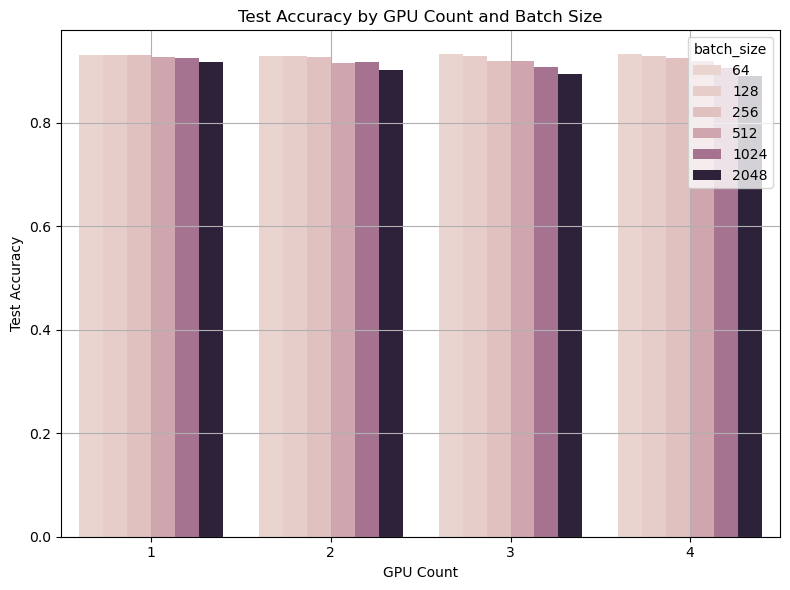

Best Configuration Based on Highest Test Accuracy:
GPU Count: 4, Batch Size: 64
Test Accuracy: 0.9325
Test Loss: 0.2257
Total Training Time: 45.43 seconds


In [7]:
# Create a bar plot with GPU count on the x-axis and test accuracy on the y-axis,
# differentiating the bars by batch size using the hue parameter.
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=ddp_metrics_test, x='gpu_count', y='test_acc', hue='batch_size')

# Enable grid boxes on the plot
ax.grid(True)

# Setting titles and labels
ax.set_title('Test Accuracy by GPU Count and Batch Size')
ax.set_xlabel('GPU Count')
ax.set_ylabel('Test Accuracy')

plt.tight_layout()
plt.show()

# Identify the best configuration based on the highest test accuracy.
best_config = ddp_metrics_test.loc[ddp_metrics_test['test_acc'].idxmax()]

print("Best Configuration Based on Highest Test Accuracy:")
print(f"GPU Count: {best_config['gpu_count']}, Batch Size: {best_config['batch_size']}")
print(f"Test Accuracy: {best_config['test_acc']:.4f}")
print(f"Test Loss: {best_config['test_loss']:.4f}")
print(f"Total Training Time: {best_config['total_training_time']:.2f} seconds")

### Visual Insights:

The plot reveals several key patterns:
- **Performance by Batch Size**: Smaller batch sizes (lighter colors) consistently achieve higher test accuracy across all GPU configurations
- **Scaling Patterns**: As we increase GPU count, the performance difference between small and large batch sizes becomes more pronounced
- **Diminishing Returns**: Larger batch sizes (1024, 2048) show significant accuracy degradation, especially with 3-4 GPUs

### Best Configuration Results:
The optimal setup uses 4 GPUs with a batch size of 64, achieving:
- Test accuracy of 93.25%
- Test loss of 0.2257
- Total training time of just 45.43 seconds

This demonstrates that we can achieve both high accuracy and fast training by parallelizing across multiple GPUs while keeping the batch size small, rather than increasing both GPU count and batch size together.

## Analyzing Training Time Scaling with Multiple GPUs

Visualizing Training Efficiency Across Configurations

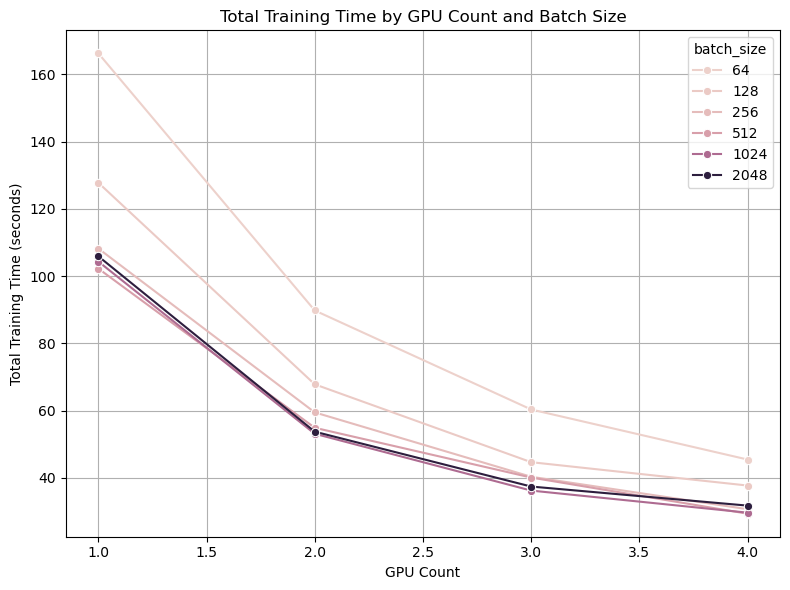

In [8]:
# Create a line plot with GPU count on the x-axis and total training time on the y-axis.
# Different lines (and colors) represent different batch sizes.
plt.figure(figsize=(8, 6))
ax = sns.lineplot(data=ddp_metrics_test, x='gpu_count', y='total_training_time', hue='batch_size', marker='o')

# Set plot title and axis labels
ax.set_title("Total Training Time by GPU Count and Batch Size")
ax.set_xlabel("GPU Count")
ax.set_ylabel("Total Training Time (seconds)")

# Enable grid boxes for better readability of the chart
ax.grid(True)

plt.tight_layout()
plt.show()

1. **Scaling Efficiency**: 
   - All configurations show significant speedups as we increase GPU count
   - With batch size 64, training time decreases from ~166 seconds (1 GPU) to ~45 seconds (4 GPUs)
   - This represents a ~3.7x speedup using 4x the hardware resources, indicating good but not perfect scaling

2. **Diminishing Returns**:
   - The most dramatic time reduction occurs when going from 1 to 2 GPUs
   - Adding the 3rd and 4th GPU provides progressively smaller improvements
   - This is typical in distributed systems due to communication overhead

3. **Batch Size Impact**:
   - Smaller batch sizes (64, 128) show steeper curves and greater absolute time reductions
   - Larger batch sizes (1024, 2048) have flatter curves, meaning they benefit proportionally less from additional GPUs
   - The curves converge as GPU count increases, suggesting diminishing differences between batch sizes at higher parallelism

4. **Ideal Configuration Selection**:
   - For time-critical applications: 4 GPUs with larger batch sizes provide minimum training time
   - For accuracy-critical applications: 4 GPUs with batch size 64 balances speed with maintaining high accuracy (as seen in previous plots)

## Training Time Analysis by GPU Count and Batch Size

Visualizing Computational Efficiency with Bar Plots

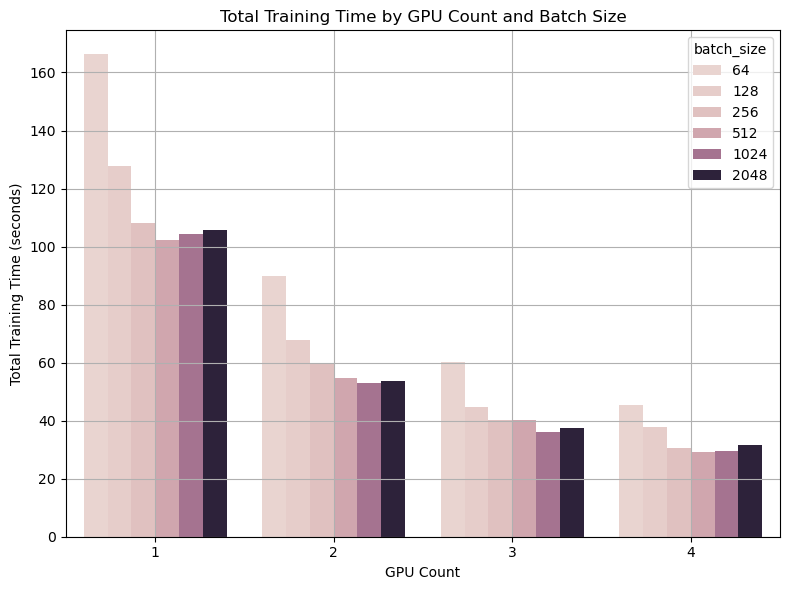

In [9]:
# Create a bar plot with GPU count on the x-axis and total training time on the y-axis.
# Use the hue parameter to differentiate various batch sizes.
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=ddp_metrics_test, x='gpu_count', y='total_training_time', hue='batch_size')

# Enable grid boxes for the plot
ax.grid(True)

# Set the title and axis labels for clarity
ax.set_title('Total Training Time by GPU Count and Batch Size')
ax.set_xlabel('GPU Count')
ax.set_ylabel('Total Training Time (seconds)')

plt.tight_layout()
plt.show()

The bar chart reveals several important patterns about distributed training efficiency:

1. **Scaling Pattern**: Adding more GPUs drastically reduces training time across all batch sizes. The most dramatic reduction occurs when moving from 1 to 2 GPUs.

2. **Batch Size Impact**: With 1 GPU, smaller batch sizes (64, 128) have significantly longer training times than larger ones. This is because processing many small batches incurs more overhead.

3. **Convergence Trend**: As GPU count increases, the training time difference between batch sizes diminishes. By 4 GPUs, all configurations achieve similar training times (30-45 seconds).

4. **Optimization Decision Point**: The visualization makes clear that the combination of 4 GPUs with batch size 64 provides the best balance between speed  and accuracy (as we saw in previous visualizations).

## Finding the Fastest Training Configuration

In [10]:
# Identify the best configuration based on the lowest total training time
best_config = ddp_metrics_test.loc[ddp_metrics_test['total_training_time'].idxmin()]

print("Best Configuration Based on Lowest Total Training Time:")
print(f"GPU Count: {best_config['gpu_count']}, Batch Size: {best_config['batch_size']}")
print(f"Total Training Time: {best_config['total_training_time']:.2f} seconds")
print(f"Test Loss: {best_config['test_loss']:.4f}")
print(f"Test Accuracy: {best_config['test_acc']:.4f}")
print()

Best Configuration Based on Lowest Total Training Time:
GPU Count: 4, Batch Size: 512
Total Training Time: 29.32 seconds
Test Loss: 0.2793
Test Accuracy: 0.9191



The fastest training configuration is:
- **GPU Count: 4, Batch Size: 512** - Using maximum parallelism with a moderate batch size
- **Total Training Time: 29.32 seconds** - Approximately 5.7× faster than the single-GPU baseline (166.22s)
- **Test Accuracy: 91.91%** - Still maintains good model performance
- **Test Loss: 0.2793** - Slightly higher than some configurations but acceptable

## Finding the Best Configuration Based on Highest Test Accuracy and Lowest Total Training Time (Composite)

Balancing Speed and Accuracy with a Composite Score

In [11]:
# Compute a composite score that favors high test accuracy and low training time.
# A simple formula is: composite_score = test_acc / total_training_time
ddp_metrics_test['composite'] = ddp_metrics_test['test_acc'] / ddp_metrics_test['total_training_time']

# Identify the best configuration based on this composite score
best_composite_config = ddp_metrics_test.loc[ddp_metrics_test['composite'].idxmax()]

print("Best Configuration Based on Highest Test Accuracy and Lowest Total Training Time (Composite):")
print(f"GPU Count: {best_composite_config['gpu_count']}, Batch Size: {best_composite_config['batch_size']}")
print(f"Total Training Time: {best_composite_config['total_training_time']:.2f} seconds")
print(f"Test Loss: {best_composite_config['test_loss']:.4f}")
print(f"Test Accuracy: {best_composite_config['test_acc']:.4f}")
print(f"Composite Score: {best_composite_config['composite']:.6f}")

Best Configuration Based on Highest Test Accuracy and Lowest Total Training Time (Composite):
GPU Count: 4, Batch Size: 512
Total Training Time: 29.32 seconds
Test Loss: 0.2793
Test Accuracy: 0.9191
Composite Score: 0.031349


Based on this balanced metric, the best configuration is:
- **GPU Count: 4, Batch Size: 512**
- **Training Time: 29.32 seconds** (5.7× faster than single-GPU baseline)
- **Test Accuracy: 91.91%** (only ~1.3% lower than the highest accuracy configuration)
- **Composite Score: 0.031349** (highest accuracy-to-time ratio)

## Analyzing Distributed Training Performance Metrics

Understanding DDP Scaling Behavior Across Multiple GPUs


=== Wall Clock Time Table ===

Batch Size: 64
 gpu_count  batch_size  total_training_time  speedup  efficiency
         1          64              166.221    1.000       1.000
         2          64               89.758    1.852       0.926
         3          64               60.313    2.756       0.919
         4          64               45.430    3.659       0.915

Batch Size: 128
 gpu_count  batch_size  total_training_time  speedup  efficiency
         1         128              127.739    1.000       1.000
         2         128               67.792    1.884       0.942
         3         128               44.640    2.862       0.954
         4         128               37.692    3.389       0.847

Batch Size: 256
 gpu_count  batch_size  total_training_time  speedup  efficiency
         1         256              108.184    1.000       1.000
         2         256               59.446    1.820       0.910
         3         256               40.302    2.684       0.895
         

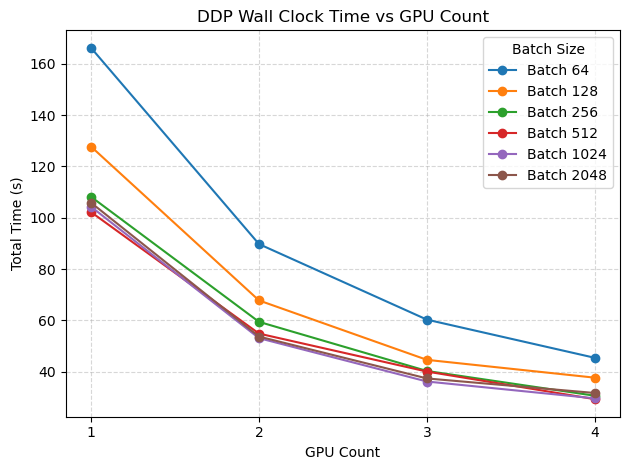


=== Speedup Table ===

Batch Size: 64
 gpu_count  batch_size  total_training_time  speedup  efficiency
         1          64              166.221    1.000       1.000
         2          64               89.758    1.852       0.926
         3          64               60.313    2.756       0.919
         4          64               45.430    3.659       0.915

Batch Size: 128
 gpu_count  batch_size  total_training_time  speedup  efficiency
         1         128              127.739    1.000       1.000
         2         128               67.792    1.884       0.942
         3         128               44.640    2.862       0.954
         4         128               37.692    3.389       0.847

Batch Size: 256
 gpu_count  batch_size  total_training_time  speedup  efficiency
         1         256              108.184    1.000       1.000
         2         256               59.446    1.820       0.910
         3         256               40.302    2.684       0.895
         4       

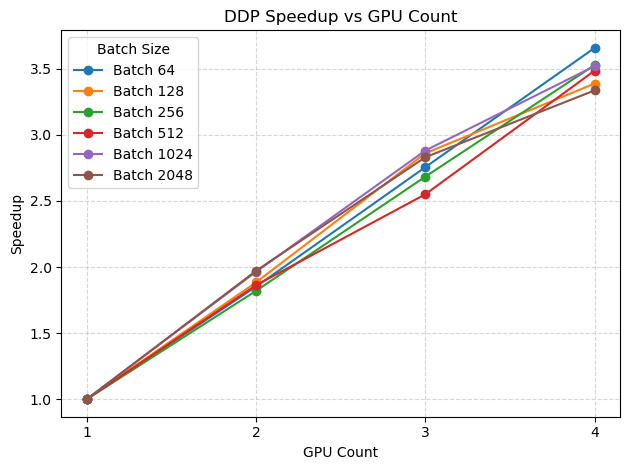


=== Efficiency Table ===

Batch Size: 64
 gpu_count  batch_size  total_training_time  speedup  efficiency
         1          64              166.221    1.000       1.000
         2          64               89.758    1.852       0.926
         3          64               60.313    2.756       0.919
         4          64               45.430    3.659       0.915

Batch Size: 128
 gpu_count  batch_size  total_training_time  speedup  efficiency
         1         128              127.739    1.000       1.000
         2         128               67.792    1.884       0.942
         3         128               44.640    2.862       0.954
         4         128               37.692    3.389       0.847

Batch Size: 256
 gpu_count  batch_size  total_training_time  speedup  efficiency
         1         256              108.184    1.000       1.000
         2         256               59.446    1.820       0.910
         3         256               40.302    2.684       0.895
         4    

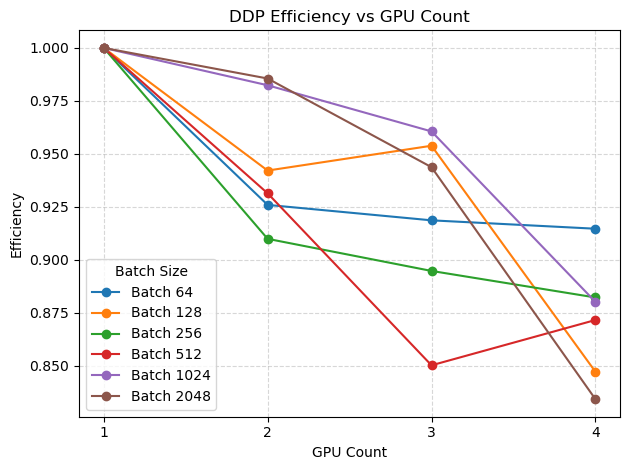

In [12]:
# Get all unique batch sizes sorted
batch_sizes = sorted(ddp_metrics_test['batch_size'].unique())

# Loop for each metric type
for plot_type in ['Wall Clock Time', 'Speedup', 'Efficiency']:
    print(f"\n=== {plot_type} Table ===")

    for batch_size in batch_sizes:
        df_subset = ddp_metrics_test[ddp_metrics_test['batch_size'] == batch_size].copy()
        df_subset.sort_values('gpu_count', inplace=True)

        # Compute speedup and efficiency
        base_time = df_subset[df_subset['gpu_count'] == 1]['total_training_time'].values[0]
        df_subset['speedup'] = base_time / df_subset['total_training_time']
        df_subset['efficiency'] = df_subset['speedup'] / df_subset['gpu_count']

        # Columns to display
        display_cols = ['gpu_count', 'batch_size', 'total_training_time', 'speedup', 'efficiency']
        print(f"\nBatch Size: {batch_size}")
        print(df_subset[display_cols].round(3).to_string(index=False))

    # Plotting
    plt.figure()
    for batch_size in batch_sizes:
        df_subset = ddp_metrics_test[ddp_metrics_test['batch_size'] == batch_size].copy()
        df_subset.sort_values('gpu_count', inplace=True)

        base_time = df_subset[df_subset['gpu_count'] == 1]['total_training_time'].values[0]
        df_subset['speedup'] = base_time / df_subset['total_training_time']
        df_subset['efficiency'] = df_subset['speedup'] / df_subset['gpu_count']

        # Select y-axis
        if plot_type == 'Wall Clock Time':
            y_data = df_subset['total_training_time']
            ylabel = 'Total Time (s)'
        elif plot_type == 'Speedup':
            y_data = df_subset['speedup']
            ylabel = 'Speedup'
        else:
            y_data = df_subset['efficiency']
            ylabel = 'Efficiency'

        plt.plot(df_subset['gpu_count'], y_data, marker='o', label=f'Batch {batch_size}')

    plt.title(f'DDP {plot_type} vs GPU Count')
    plt.xlabel('GPU Count')
    plt.ylabel(ylabel)
    plt.xticks([1, 2, 3, 4])
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(title='Batch Size')
    plt.tight_layout()
    plt.show()

These three visualizations and the accompanying tabular data provide a comprehensive analysis of how PyTorch's Distributed Data Parallel (DDP) training scales across multiple GPUs with various batch sizes. Together, they illustrate the critical trade-offs in distributed deep learning.

### Wall Clock Time Analysis
The first plot shows the total training time decreasing as more GPUs are added:

- **Small Batch Sizes (64, 128)**: Show the most dramatic absolute time reductions, with batch size 64 dropping from 166s to 45s with 4 GPUs
- **Larger Batch Sizes**: Start with lower training times on a single GPU but still benefit from parallelization
- **Convergence Pattern**: All batch sizes trend toward similar training times as GPU count increases
- **Diminishing Returns**: The steepest time reductions occur when going from 1→2 GPUs, with smaller gains for 3→4 GPUs

### Speedup Analysis
The second plot quantifies the acceleration factor relative to single-GPU training:

- **Near-Linear Scaling**: Most configurations achieve 3.3-3.7× speedup with 4 GPUs (82-92% of theoretical 4× speedup)
- **Best Scaling**: Batch 64 achieves the highest speedup (3.66×) with 4 GPUs
- **Consistent Trends**: All batch sizes follow similar speedup curves with minimal differences
- **Observation**: Speedup continues to increase with more GPUs, though at a decreasing rate

### Efficiency Analysis
The third plot reveals the parallel efficiency (speedup/GPU count), showing how effectively each GPU is utilized:

- **Universal Efficiency Loss**: All configurations show some efficiency decline as GPUs increase
- **Batch Size Differences**: Larger disparities between batch sizes emerge in efficiency compared to speedup
- **Batch Size 64**: Maintains the most consistent efficiency (~91.5% with 4 GPUs)
- **Batch 2048**: Shows the largest efficiency drop (down to 83.4% with 4 GPUs)
- **Unusual Patterns**: Some configurations show non-monotonic behavior (e.g., batch 512 dips at 3 GPUs)

### Practical Implications
Based on all metrics:

1. **Best Overall Configuration**: 4 GPUs with batch size 64 offers optimal balance of speed (3.66× speedup) while maintaining high parallel efficiency (91.5%) and the best accuracy (93.25%)

3. **Scaling Limitations**: Communication overhead prevents perfect linear scaling, but the system still demonstrates excellent parallelism

## Training Time Reduction Analysis

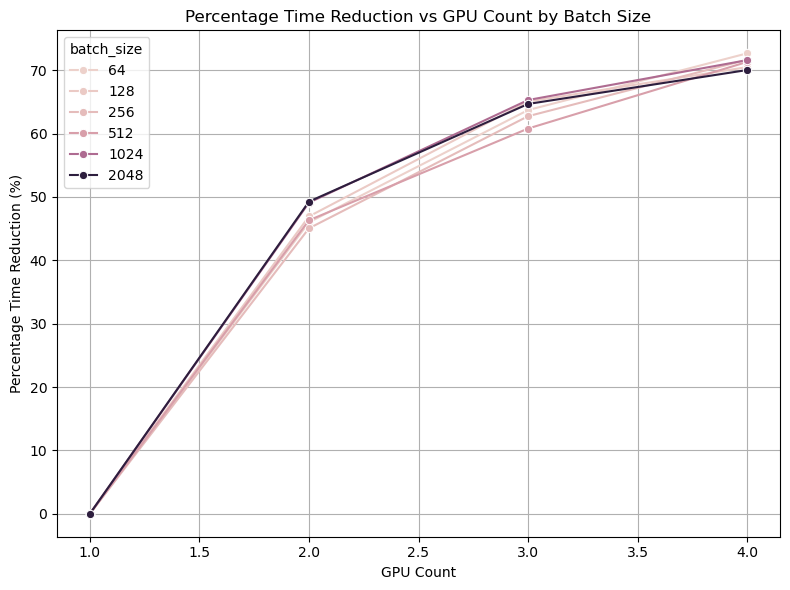

Percentage Training Time Reduction:
    gpu_count  batch_size  total_training_time  perc_time_reduction
0           1          64           166.221044             0.000000
1           2          64            89.758089            46.000767
2           3          64            60.312971            63.715202
3           4          64            45.430460            72.668647
4           1         128           127.738831             0.000000
5           2         128            67.792323            46.928963
6           3         128            44.639975            65.053716
7           4         128            37.692451            70.492566
8           1         256           108.184208             0.000000
9           2         256            59.446196            45.050949
10          3         256            40.301718            62.747134
11          4         256            30.655070            71.664006
12          1         512           102.217083             0.000000
13          

In [13]:
# Compute the baseline training time for each batch size (using the configuration with 1 GPU)
# This creates a mapping from batch_size to total_training_time where gpu_count == 1.
baseline_times = ddp_metrics_test[ddp_metrics_test['gpu_count'] == 1].set_index('batch_size')['total_training_time']

# Map the baseline training time into each row based on its batch_size.
ddp_metrics_test['baseline_time'] = ddp_metrics_test['batch_size'].map(baseline_times)

# Compute the percentage reduction in training time relative to the baseline:
# Percentage Reduction = 100 * (baseline_time - current_total_training_time) / baseline_time
ddp_metrics_test['perc_time_reduction'] = 100 * (ddp_metrics_test['baseline_time'] - ddp_metrics_test['total_training_time']) / ddp_metrics_test['baseline_time']

# Create a line plot showing the percentage time reduction vs. GPU count for each batch size.
plt.figure(figsize=(8, 6))
ax = sns.lineplot(data=ddp_metrics_test, x='gpu_count', y='perc_time_reduction', hue='batch_size', marker='o')

# Set the title and axis labels for clarity.
ax.set_title('Percentage Time Reduction vs GPU Count by Batch Size')
ax.set_xlabel('GPU Count')
ax.set_ylabel('Percentage Time Reduction (%)')

# Enable grid boxes for improved readability.
ax.grid(True)

plt.tight_layout()
plt.show()

# Print the resulting data including GPU count, batch size, total training time, baseline time, and percentage time reduction.
print("Percentage Training Time Reduction:")
print(ddp_metrics_test[['gpu_count', 'batch_size', 'total_training_time', 'perc_time_reduction']])

1. **Substantial Time Savings**:
   - With 2 GPUs: Training time is reduced by 45-49% across batch sizes
   - With 3 GPUs: Training time is reduced by 60-65%
   - With 4 GPUs: Training time is reduced by 70-72%

2. **Batch Size Variations**:
   - Batch size 64 achieves the highest percentage reduction (72.7%) with 4 GPUs
   - Larger batch sizes (1024, 2048) show strong reductions at 2 GPUs (~49%)
   - All batch sizes converge to similar reduction percentages at 4 GPUs (70-72%)

3. **Scaling Efficiency Analysis**:
   - Ideal linear scaling with 4 GPUs would yield 75% reduction
   - Actual reductions of 70-72% represent 93-96% of perfect scaling efficiency
   - This indicates excellent parallelization with minimal communication overhead

4. **Diminishing Returns Pattern**:
   - First doubling (1→2 GPUs): ~45-49% reduction
   - Second doubling (2→4 GPUs): Additional ~25% reduction
   - The scaling curve begins to flatten between 3-4 GPUs

## GPU Memory Usage Analysis in Distributed Training

Understanding GPU Memory Scaling with Batch Size and Parallelism

Aggregated Data (Maximum Epoch) for Memory Usage by Batch Size and GPU Count:
    gpu_count  batch_size  mem_used_MB
0           1          64   778.374755
1           1         128   831.961669
2           1         256   955.013062
3           1         512  1113.789124
4           1        1024  1538.515074
5           1        2048  3054.826233
6           2          64   540.210692
7           2         128   593.797606
8           2         256   682.116760
9           2         512   875.625061
10          2        1024  1300.351011
11          2        2048  2816.662170
12          3          64   540.210673
13          3         128   593.797587
14          3         256   693.694154
15          3         512   875.625061
16          3        1024  1300.350972
17          3        2048  2816.662170
18          4          64   540.210692
19          4         128   588.835875
20          4         256   699.482851
21          4         512   875.625061
22          4        1024

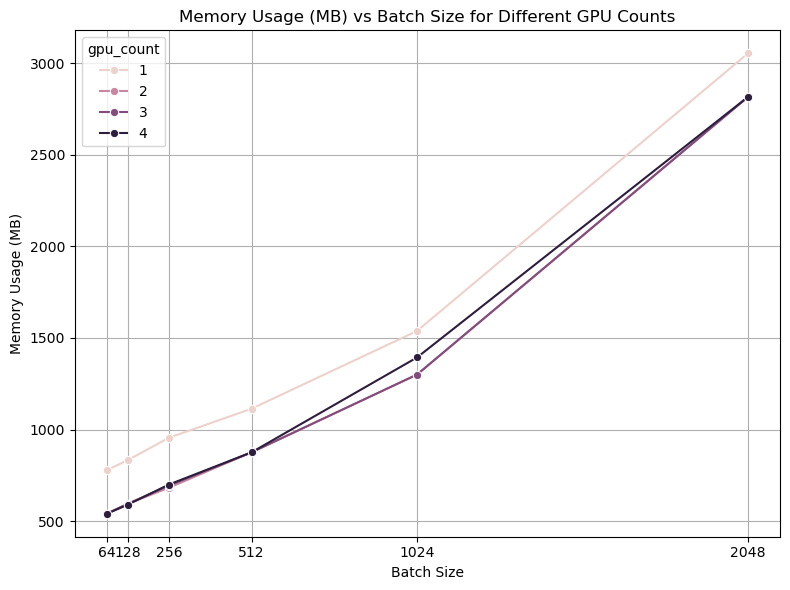

In [14]:
# Convert the 'each_gpu_memory' column (e.g., "12194MB") to a numeric value in MB.
ddp_metrics_epoch["each_gpu_memory_numeric"] = (
    ddp_metrics_epoch["each_gpu_memory"].str.replace("MB", "", regex=False).astype(float)
)

# Compute the absolute memory usage in MB based on mem_util (a percentage).
# Example: if each_gpu_memory = 12194 MB and mem_util = 6.383260,
# then mem_used_MB ≈ 12194 * (6.383260 / 100) ≈ 778 MB.
ddp_metrics_epoch["mem_used_MB"] = ddp_metrics_epoch["each_gpu_memory_numeric"] * (ddp_metrics_epoch["mem_util"] / 100)

# For each combination of gpu_count and batch_size, select the record corresponding to the maximum epoch.
# This aggregated data is assumed to represent the final memory usage for each configuration.
aggregated_data = ddp_metrics_epoch.loc[
    ddp_metrics_epoch.groupby(["gpu_count", "batch_size"])["epoch"].idxmax()
].reset_index(drop=True)

# Print the aggregated data for reference.
print("Aggregated Data (Maximum Epoch) for Memory Usage by Batch Size and GPU Count:")
print(aggregated_data[["gpu_count", "batch_size", "mem_used_MB"]])

# Create a single line plot showing memory usage vs. batch size,
# with separate lines for different GPU counts.
plt.figure(figsize=(8, 6))
ax = sns.lineplot(
    data=aggregated_data, 
    x="batch_size", 
    y="mem_used_MB", 
    hue="gpu_count", 
    marker="o"
)

# Ensure the x-axis has the exact batch size values.
unique_batch_sizes = sorted(aggregated_data["batch_size"].unique())
ax.set_xticks(unique_batch_sizes)
ax.set_xticklabels(unique_batch_sizes)

# Set title and axis labels for clarity.
ax.set_title("Memory Usage (MB) vs Batch Size for Different GPU Counts")
ax.set_xlabel("Batch Size")
ax.set_ylabel("Memory Usage (MB)")

# Enable grid lines for improved readability.
ax.grid(True)

plt.tight_layout()
plt.show()

1. **Memory Scaling with Batch Size**:
   - Memory usage increases nonlinearly with batch size across all configurations
   - The steepest increase occurs between batch sizes 1024 and 2048 (almost doubling)

GPU Memory Efficiency Across Configurations

In [15]:
# Convert the 'each_gpu_memory' column (e.g., "12194MB") to a numeric value (in MB).
ddp_metrics_epoch["each_gpu_memory_numeric"] = ddp_metrics_epoch["each_gpu_memory"].str.replace("MB", "", regex=False).astype(float)

# Compute the absolute memory usage in MB based on mem_util (a percentage).
# For example, if each_gpu_memory = 12194 MB and mem_util = 6.383260,
# then mem_used_MB ≈ 12194 * (6.383260 / 100) ≈ 778 MB.
ddp_metrics_epoch["mem_used_MB"] = ddp_metrics_epoch["each_gpu_memory_numeric"] * (ddp_metrics_epoch["mem_util"] / 100)

# For each combination of gpu_count and batch_size, select the record corresponding to the maximum epoch.
aggregated_data = ddp_metrics_epoch.loc[
    ddp_metrics_epoch.groupby(["gpu_count", "batch_size"])["epoch"].idxmax()
].reset_index(drop=True)

# Add a new column for total memory usage across all GPUs based on utilization.
aggregated_data["total_mem_used_MB"] = aggregated_data["gpu_count"] * aggregated_data["mem_used_MB"]

# Add two new columns:
# 1. memory_each_gpu: the total available memory per GPU (in MB), derived from each_gpu_memory_numeric.
# 2. total_memory_all_gpus: the total available memory when using all GPUs.
aggregated_data["memory_each_gpu"] = aggregated_data["each_gpu_memory_numeric"]
aggregated_data["total_memory_all_gpus"] = aggregated_data["gpu_count"] * aggregated_data["each_gpu_memory_numeric"]

# Add a new column for the percentage used.
aggregated_data["percentage_memory_used"] = aggregated_data["mem_util"]

# Print all the desired columns side by side as a table.
print("Aggregated Data (All Columns):")
cols_to_print = [
    "gpu_count", 
    "batch_size", 
    "mem_used_MB", 
    "total_mem_used_MB", 
    "memory_each_gpu", 
    "total_memory_all_gpus",
    "percentage_memory_used"
]
print(aggregated_data[cols_to_print].to_string(index=False))

Aggregated Data (All Columns):
 gpu_count  batch_size  mem_used_MB  total_mem_used_MB  memory_each_gpu  total_memory_all_gpus  percentage_memory_used
         1          64   778.374755         778.374755          12194.0                12194.0                6.383260
         1         128   831.961669         831.961669          12194.0                12194.0                6.822713
         1         256   955.013062         955.013062          12194.0                12194.0                7.831828
         1         512  1113.789124        1113.789124          12194.0                12194.0                9.133911
         1        1024  1538.515074        1538.515074          12194.0                12194.0               12.616984
         1        2048  3054.826233        3054.826233          12194.0                12194.0               25.051880
         2          64   540.210692        1080.421385          12194.0                24388.0                4.430135
         2       

1. **Batch Size Impact**:
   - Memory usage per GPU increases dramatically with batch size
   - With 1 GPU: memory jumps from 778MB (batch 64) to 3055MB (batch 2048) - a 3.9× increase
   - Memory usage growth is non-linear, with the most significant jump between batch 1024 and 2048

2. **Distributed Memory Advantage**:
   - Multi-GPU setups use significantly less memory per GPU
   - For batch size 64: 778MB (1 GPU) vs 540MB (4 GPUs) - a 31% reduction per GPU
   - This memory efficiency helps maintain model quality with parallelism

3. **Resource Utilization**:
   - Single GPU configurations reach 25% memory utilization with batch size 2048
   - Memory utilization is more efficient in multi-GPU setups for small batches
   - At the largest batch size (2048), utilization converges to ~23% regardless of GPU count

## Comprehensive Memory Visualization Across Configurations

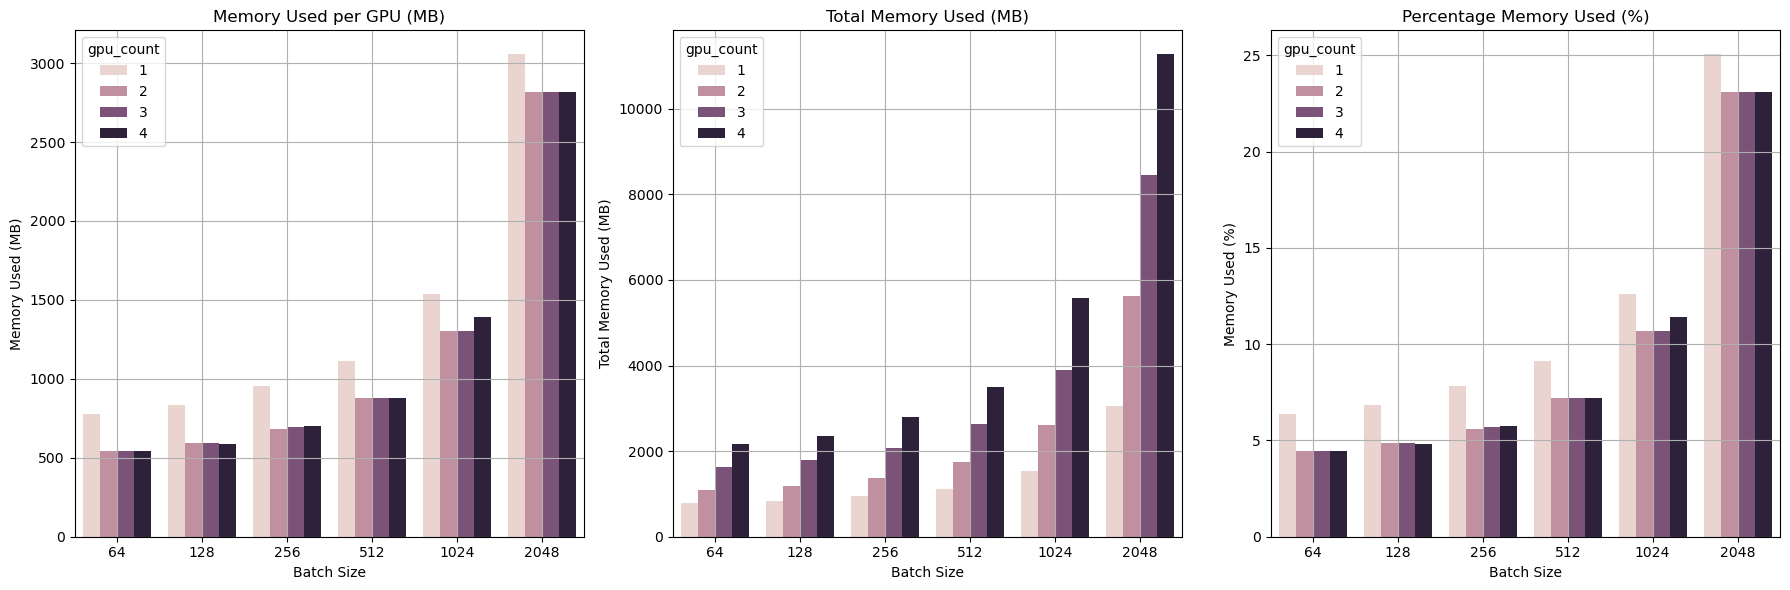

In [16]:
# Get unique sorted batch sizes (for x-axis ticks).
unique_batch_sizes = sorted(aggregated_data["batch_size"].unique())

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharex=True)

# Plot 1: Memory Used per GPU (MB)
sns.barplot(ax=axes[0], data=aggregated_data, x="batch_size", y="mem_used_MB", hue="gpu_count")
axes[0].set_title("Memory Used per GPU (MB)")
axes[0].set_xlabel("Batch Size")
axes[0].set_ylabel("Memory Used (MB)")
axes[0].grid(True)
axes[0].set_xticks   # set exact batch sizes
axes[0].set_xticklabels

# Plot 2: Total Memory Used across all GPUs (MB)
sns.barplot(ax=axes[1], data=aggregated_data, x="batch_size", y="total_mem_used_MB", hue="gpu_count")
axes[1].set_title("Total Memory Used (MB)")
axes[1].set_xlabel("Batch Size")
axes[1].set_ylabel("Total Memory Used (MB)")
axes[1].grid(True)
axes[1].set_xticks
axes[1].set_xticklabels

# Plot 3: Percentage Memory Used (%)
sns.barplot(ax=axes[2], data=aggregated_data, x="batch_size", y="percentage_memory_used", hue="gpu_count")
axes[2].set_title("Percentage Memory Used (%)")
axes[2].set_xlabel("Batch Size")
axes[2].set_ylabel("Memory Used (%)")
axes[2].grid(True)
axes[2].set_xticks
axes[2].set_xticklabels

# Adjust layout so titles and labels don't overlap.
plt.tight_layout()
plt.show()

1. **Memory Per GPU (Left Plot)**:
   - Single GPU training (lightest bars) requires significantly more memory per device than distributed configurations
   - Memory usage increases with batch size for all configurations, with a dramatic jump at batch size 2048
   - Memory requirements per device decrease as GPU count increases (distributing the memory burden)
   - With batch size 64: Single GPU uses ~780MB while 4 GPUs use only ~540MB each (31% reduction)

2. **Total System Memory (Middle Plot)**:
   - Shows the aggregate memory footprint across all GPUs in the system
   - Increases with both batch size and GPU count
   - 4 GPU configurations with batch size 2048 consume the most total memory (~11,270MB)
   - Demonstrates the total memory investment required for distributed training

3. **Memory Utilization Percentage (Right Plot)**:
   - Single GPU reaches ~25% utilization with batch size 2048
   - Multi-GPU setups maintain lower per-device utilization (more headroom for scaling)
   - All configurations show similar utilization patterns across batch sizes
   - With 4 GPUs, utilization stays under 12% until the largest batch size

### Key Insights for Distributed Training:

- **Memory Efficiency Trade-off**: While distributed training requires more total system memory, it uses individual GPU memory more efficiently
- **Scaling Advantage**: Lower per-GPU memory consumption in multi-GPU setups enables training larger models or using larger batch sizes
- **Resource Planning**: The visualizations help determine optimal configurations based on available hardware
- **Implementation Detail**: The memory patterns suggest PyTorch's DDP effectively distributes both computation and memory resources

## Throughput Analysis in Distributed Training

Training Throughput Across GPU and Batch Size Configurations

Aggregated Throughput Data:
 gpu_count  batch_size  train_throughput
         1          64      13571.215601
         1         128      17673.527975
         1         256      20878.329546
         1         512      21944.245393
         1        1024      21690.505071
         1        2048      21534.609867
         2          64      26151.671338
         2         128      28088.360736
         2         256      37687.842597
         2         512      41213.447267
         2        1024      41956.962067
         2        2048      42236.778456
         3          64      37218.988080
         3         128      51456.837963
         3         256      54893.070205
         3         512      54491.170958
         3        1024      63304.288172
         3        2048      62057.205098
         4          64      50904.496352
         4         128      54603.300265
         4         256      71938.194395
         4         512      83456.461287
         4        1024      8

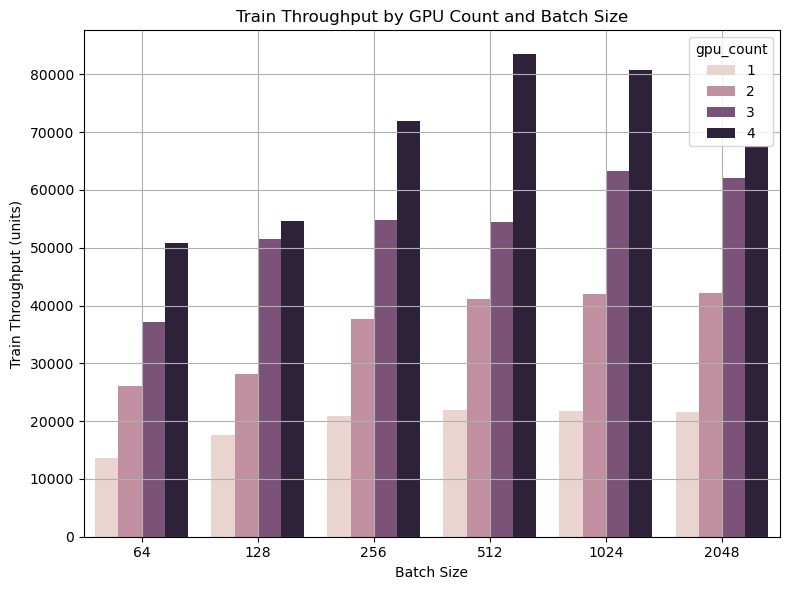

In [17]:
# For each combination of gpu_count and batch_size, select the record corresponding to the maximum epoch.
aggregated_data = ddp_metrics_epoch.loc[
    ddp_metrics_epoch.groupby(["gpu_count", "batch_size"])["epoch"].idxmax()
].reset_index(drop=True)

# Print aggregated throughput data for reference
print("Aggregated Throughput Data:")
print(aggregated_data[["gpu_count", "batch_size", "train_throughput"]].to_string(index=False))

# Create a bar plot for train throughput.
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=aggregated_data,
    x="batch_size",
    y="train_throughput",
    hue="gpu_count"
)

# Set the title and axis labels.
ax.set_title("Train Throughput by GPU Count and Batch Size")
ax.set_xlabel("Batch Size")
ax.set_ylabel("Train Throughput (units)")

# Enable grid boxes for better readability.
ax.grid(True)

plt.tight_layout()
plt.show()

1. **GPU Scaling Effects**:
   - For every batch size, throughput increases substantially with more GPUs
   - With batch size 64: Throughput scales from ~13.5K (1 GPU) to ~50.9K (4 GPUs) - a 3.8× improvement
   - With batch size 512: Throughput scales from ~21.9K (1 GPU) to ~83.5K (4 GPUs) - a 3.8× improvement

2. **Batch Size Efficiency**:
   - **Single GPU**: Throughput plateaus after batch size 512 (~22K samples/sec)
   - **2 GPUs**: More gradual increase, reaching ~42K samples/sec
   - **3 GPUs**: Significant jumps at batch sizes 128 and 1024
   - **4 GPUs**: Dramatic peak at batch size 512 (~83.5K samples/sec), followed by a decline

3. **Optimal Configuration**:
   - The highest throughput (83,456 samples/sec) is achieved with 4 GPUs and batch size 512
   - This is 3.8× faster than the single GPU peak performance
   - This configuration aligns with our earlier composite score findings

4. **Throughput Limitations**:
   - All configurations show diminishing returns with increasing batch size
   - The 4 GPU configuration actually shows performance degradation at batch size 2048
   - This suggests bottlenecks beyond pure computational parallelism (likely memory bandwidth or communication overhead)

This analysis explains why 4 GPUs with batch size 512 emerged as our optimal configuration - it maximizes computational throughput while maintaining good scaling efficiency and model performance.